In [1]:
# import libraries
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import load
from pickle import dump
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import ensemble
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor

In [6]:
# convert mat data to panda
def load_data(battery):
  mat = loadmat('/Users/yi-chenlin/Desktop/Final project/battery_data/' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]

In [3]:
dataset, capacity = load_data('B0005')

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


# Data understanding

In [4]:
dataset.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cycle                 50285 non-null  int64         
 1   ambient_temperature   50285 non-null  int8          
 2   datetime              50285 non-null  datetime64[ns]
 3   capacity              50285 non-null  float64       
 4   voltage_measured      50285 non-null  float64       
 5   current_measured      50285 non-null  float64       
 6   temperature_measured  50285 non-null  float64       
 7   current_load          50285 non-null  float64       
 8   voltage_load          50285 non-null  float64       
 9   time                  50285 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), int8(1)
memory usage: 3.5 MB


## Basic statistics

In [6]:
dataset.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000


In [7]:
dataset.describe().to_csv(r'Statistics/rul-statistics.csv', index = True)

## EDA

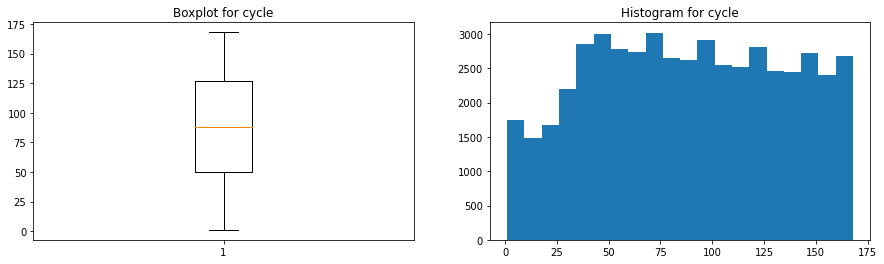

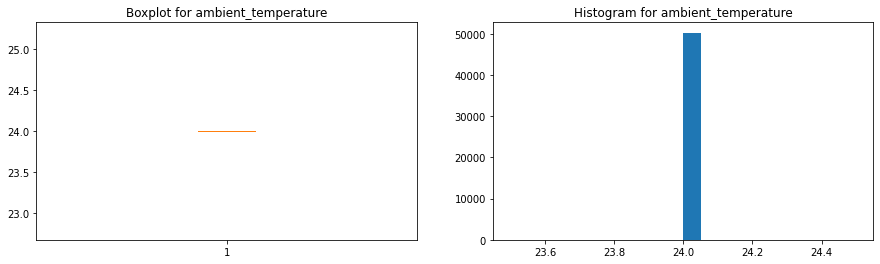

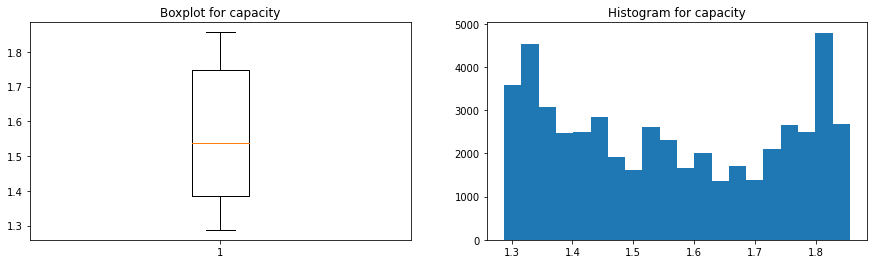

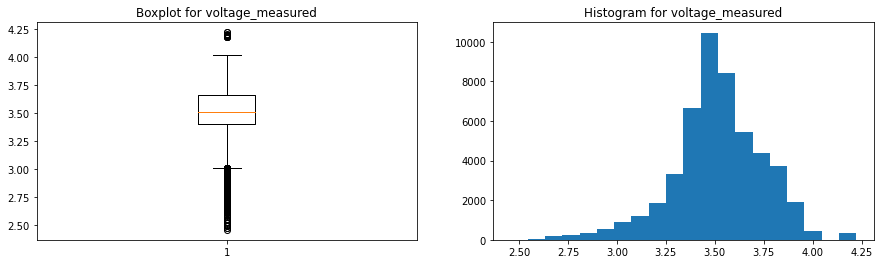

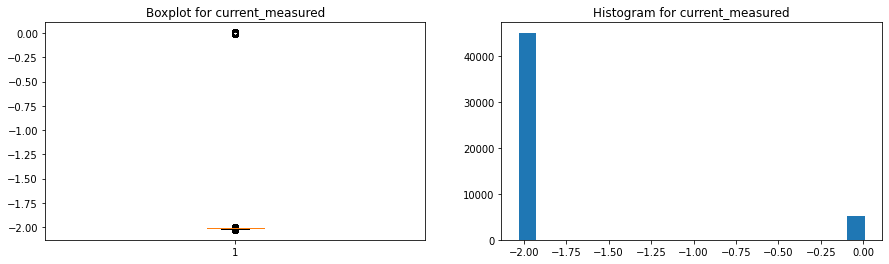

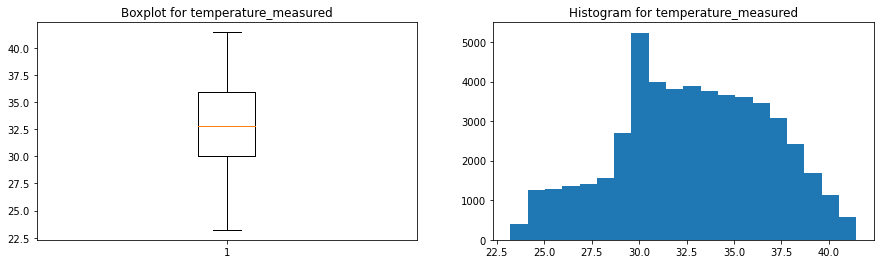

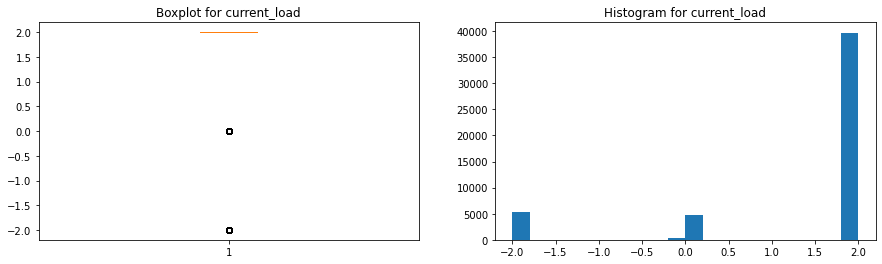

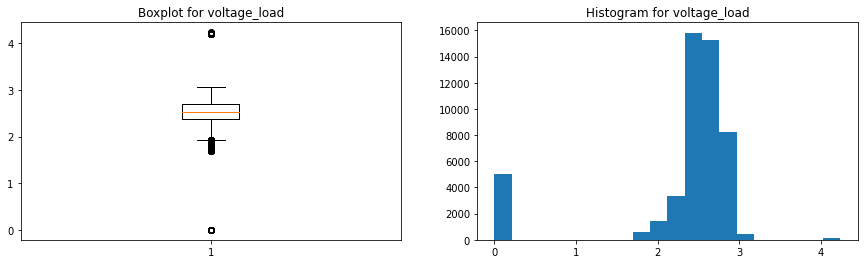

In [8]:
# Boxpot and histogram of each feature
for feature in ['cycle', 'ambient_temperature', 'capacity', 'voltage_measured', 'current_measured', 
                    'temperature_measured', 'current_load', 'voltage_load']:
    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = dataset[feature].values

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(feature) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(feature) )

    # Display
    plt.show()

In [9]:
# Checking for null values
features = ['cycle', 'ambient_temperature',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']
N_null = sum(dataset[features].isnull().sum())
print("The dataset contains {} null values".format(N_null)) 

# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]
print('Size of cleaned dataset: ', N)

The dataset contains 0 null values
The dataset contains 0 duplicates
Size of cleaned dataset:  50285


## Correlation matrix and heatmap

In [10]:
dataset[features].corr()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
cycle,1.000000,NaN,-0.986857,-0.132877,0.127769,0.139936,0.455661,-0.177385,-0.119383
ambient_temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capacity,-0.986857,NaN,1.000000,0.135859,-0.132162,-0.143717,-0.407819,0.181684,0.119542
voltage_measured,-0.132877,NaN,0.135859,1.000000,-0.091667,-0.914580,-0.034467,0.384095,-0.817528
current_measured,0.127769,NaN,-0.132162,-0.091667,1.000000,0.354628,-0.350758,-0.917754,0.416898
temperature_measured,0.139936,NaN,-0.143717,-0.914580,0.354628,1.000000,-0.091684,-0.601707,0.915537
current_load,0.455661,NaN,-0.407819,-0.034467,-0.350758,-0.091684,1.000000,0.289994,-0.225579
voltage_load,-0.177385,NaN,0.181684,0.384095,-0.917754,-0.601707,0.289994,1.000000,-0.628276
time,-0.119383,NaN,0.119542,-0.817528,0.416898,0.915537,-0.225579,-0.628276,1.000000


In [11]:
dataset.corr().to_csv(r'Statistics/battery-corr.csv', index = True)

<AxesSubplot:>

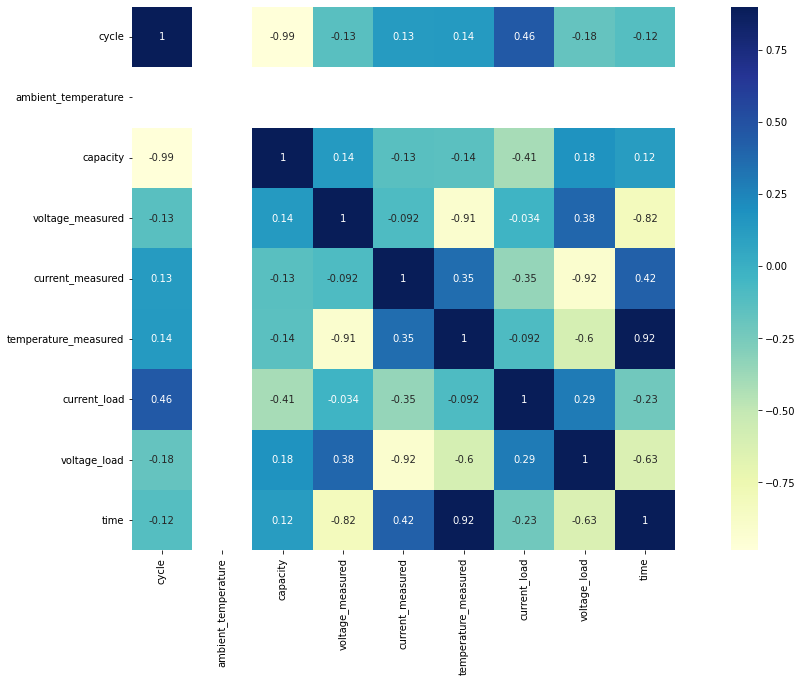

In [12]:
# make correlation matrix to heatmap
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset[features].corr(), cmap='YlGnBu', vmax = .9, square = True, annot=True)

## Feature importance

In [13]:
X = dataset[['cycle', 'ambient_temperature',
                                 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']]
y = dataset['capacity']

In [14]:
rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
single_rf.fit(X, y)
y_pred = single_rf.predict(X)

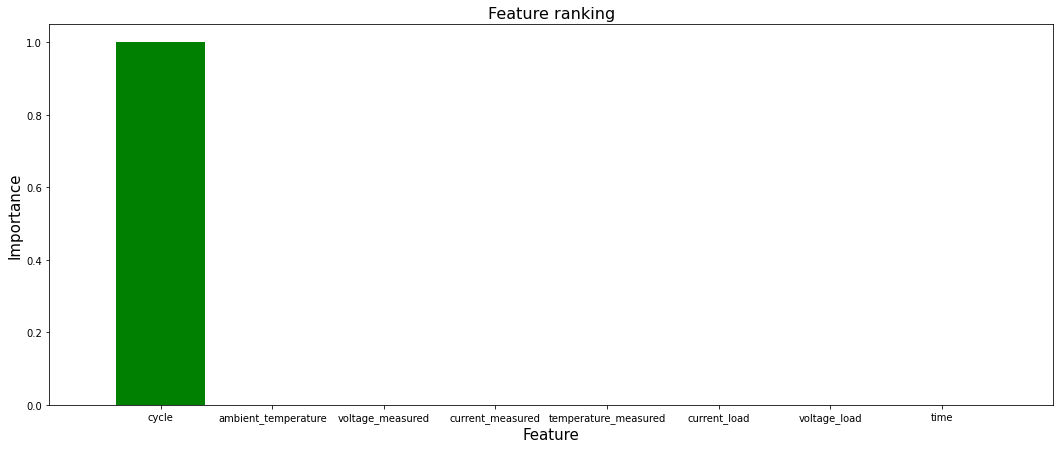

In [15]:
# graph feature importance
importances = single_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns    
f, ax = plt.subplots(figsize=(18, 7))
plt.title("Feature ranking", fontsize = 16)
plt.bar(range(X.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance", fontsize = 15)
plt.xlabel("Feature", fontsize = 15)
plt.show()

Cycle is the only one revelant to capacity

In [16]:
# list feature importance
important_features = pd.Series(data=single_rf.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features.head(10))

cycle                   9.998866e-01
current_load            1.133828e-04
current_measured        2.132527e-09
time                    1.604624e-09
voltage_measured        6.895423e-14
temperature_measured    6.502619e-14
voltage_load            5.748439e-14
ambient_temperature     0.000000e+00
dtype: float64


From the feature importance result, it seems that cycle is the only considerable feature to predict capacity. 

## Split data and scaling data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
X_train

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...
40223,135,24,3.360799,-2.010457,36.185453,1.9982,2.398,1855.031
40224,135,24,3.358384,-2.012746,36.238577,1.9982,2.396,1864.406
40225,135,24,3.356175,-2.012531,36.295522,1.9982,2.394,1873.703
40226,135,24,3.353691,-2.012193,36.352229,1.9982,2.392,1883.063


In [19]:
X_test

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
40228,135,24,3.348997,-2.011760,36.448980,1.9980,2.387,1901.828
40229,135,24,3.346386,-2.012456,36.507417,1.9982,2.384,1911.219
40230,135,24,3.343825,-2.014181,36.559807,1.9982,2.382,1920.609
40231,135,24,3.341496,-2.011917,36.622468,1.9982,2.380,1929.969
40232,135,24,3.338640,-2.012436,36.671214,1.9982,2.377,1939.359
...,...,...,...,...,...,...,...,...
50280,168,24,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,168,24,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,168,24,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,168,24,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [20]:
# pickle data for later use
dump(X_train, open("pickle/dataset/battery/X_train.pkl", "wb"))
dump(y_train, open("pickle/dataset/battery/y_train.pkl", "wb"))
dump(X_test, open("pickle/dataset/battery/X_test.pkl", "wb"))
dump(y_test, open("pickle/dataset/battery/y_test.pkl", "wb"))

## SVM regressor

In [28]:
# load data
X_train = load(open('pickle/dataset/battery/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/y_test.pkl', 'rb'))

In [29]:
svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svr.fit(X_train,y_train)

SVR(C=20, epsilon=0.0001, gamma=1e-05)

In [23]:
y_pred = svr.predict(X_train.append(X_test))

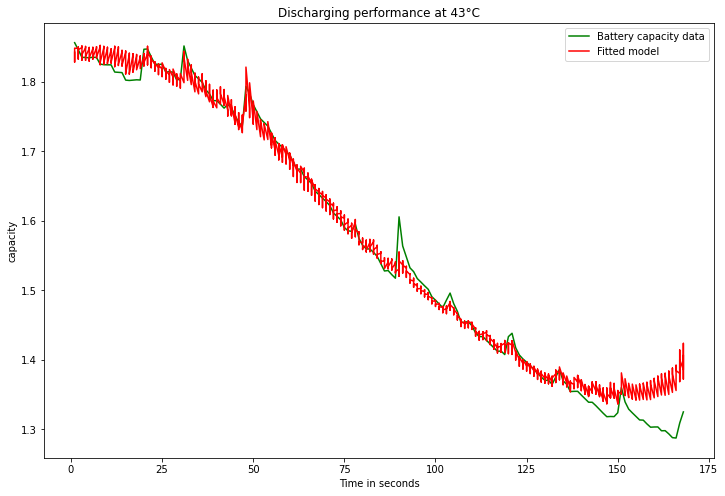

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(X_train.append(X_test)['cycle'], y_train.append(y_test), color='green', label='Battery capacity data')
ax.plot(X_train.append(X_test)['cycle'], y_pred, color='red', label='Fitted model')
ax.set(xlabel='Time in seconds', ylabel='capacity', title='Discharging performance at 43°C')
ax.legend()

In [29]:
X_merge = X_train.append(X_test)
X_merge['pre'] = y_pred
X_merge

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,pre
0,1,24,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.842779
1,1,24,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.844644
2,1,24,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.829168
3,1,24,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.828951
4,1,24,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.828908
...,...,...,...,...,...,...,...,...,...
50280,168,24,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.404779
50281,168,24,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.406343
50282,168,24,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.406139
50283,168,24,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.406639


In [30]:
X_merge['capacity'] = y_train.append(y_test)
X_merge

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,pre,capacity
0,1,24,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.842779,1.856487
1,1,24,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.844644,1.856487
2,1,24,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.829168,1.856487
3,1,24,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.828951,1.856487
4,1,24,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.828908,1.856487
...,...,...,...,...,...,...,...,...,...,...
50280,168,24,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.404779,1.325079
50281,168,24,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.406343,1.325079
50282,168,24,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.406139,1.325079
50283,168,24,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.406639,1.325079


In [31]:
#ln = len(X_train)
pred=0
Afil=0
Pfil=0
a=X_merge['capacity'].values
b=X_merge['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=X_train.append(X_test)['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=X_train.append(X_test)['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 127
The error of RUL= -2 Cycle(s)


In [ ]:
train_predictions = svr.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

## DecisionTreeRegressor

In [24]:
# load data
X_train = load(open('/Users/yi-chenlin/Desktop/Final project/pickle/dataset/battery/X_train.pkl', 'rb'))
y_train = load(open('/Users/yi-chenlin/Desktop/Final project/pickle/dataset/battery/y_train.pkl', 'rb'))
X_test = load(open('/Users/yi-chenlin/Desktop/Final project/pickle/dataset/battery/X_test.pkl', 'rb'))
y_test = load(open('/Users/yi-chenlin/Desktop/Final project/pickle/dataset/battery/y_test.pkl', 'rb'))

In [11]:
for criterion in ['mse', 'mae']:
    rgrsr = DecisionTreeRegressor(criterion=criterion)
    rgrsr.fit(X_train, y_train)
    print(f'criterion={criterion}:\n')
    print(export_text(rgrsr, feature_names=['cycle', 'ambient_temperature',
                                 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time'], spacing=3,decimals=1))

/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


criterion=mse:

|--- cycle <= 70.5
|   |--- cycle <= 53.5
|   |   |--- cycle <= 36.5
|   |   |   |--- cycle <= 7.5
|   |   |   |   |--- cycle <= 2.5
|   |   |   |   |   |--- cycle <= 1.5
|   |   |   |   |   |   |--- value: [1.9]
|   |   |   |   |   |--- cycle >  1.5
|   |   |   |   |   |   |--- current_measured <= -2.0
|   |   |   |   |   |   |   |--- value: [1.8]
|   |   |   |   |   |   |--- current_measured >  -2.0
|   |   |   |   |   |   |   |--- value: [1.8]
|   |   |   |   |--- cycle >  2.5
|   |   |   |   |   |--- cycle <= 5.5
|   |   |   |   |   |   |--- cycle <= 4.5
|   |   |   |   |   |   |   |--- cycle <= 3.5
|   |   |   |   |   |   |   |   |--- voltage_load <= 2.5
|   |   |   |   |   |   |   |   |   |--- time <= 2909.0
|   |   |   |   |   |   |   |   |   |   |--- voltage_load <= 2.5
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- voltage_load >  2.5
|   |   |   |   |   |   |   |   |   |   |   |--- valu

In [21]:

y_test_pred = rgrsr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))


MSE: 0.0025403890301515315
MAE: 0.04557622545248516


In [25]:
X_test['capacity'] = y_test
X_test['pre'] = y_test_pred

In [26]:
X_test

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,capacity,pre
40228,135,24,3.348997,-2.011760,36.448980,1.9980,2.387,1901.828,1.369850,1.36985
40229,135,24,3.346386,-2.012456,36.507417,1.9982,2.384,1911.219,1.369850,1.36985
40230,135,24,3.343825,-2.014181,36.559807,1.9982,2.382,1920.609,1.369850,1.36985
40231,135,24,3.341496,-2.011917,36.622468,1.9982,2.380,1929.969,1.369850,1.36985
40232,135,24,3.338640,-2.012436,36.671214,1.9982,2.377,1939.359,1.369850,1.36985
...,...,...,...,...,...,...,...,...,...,...
50280,168,24,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079,1.36985
50281,168,24,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079,1.36985
50282,168,24,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079,1.36985
50283,168,24,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079,1.36985


In [30]:
#ln = len(X_train)
pred=0
Afil=0
Pfil=0
a=X_test['capacity'].values
b=X_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 0
The prediction fail at cycle number: 0
The error of RUL= 0 Cycle(s)


In [14]:
# save the model
dump(rgrsr, open("/Users/yi-chenlin/Desktop/Final project/pickle/models/battery/rgrsr.pkl", "wb"))

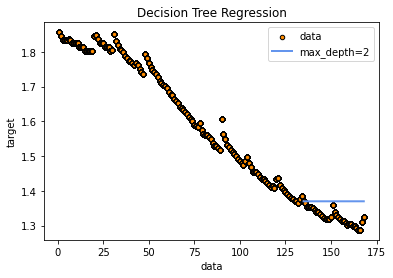

In [13]:
# Plot the results
plt.figure()
plt.scatter(X.cycle, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test.cycle, y_test_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

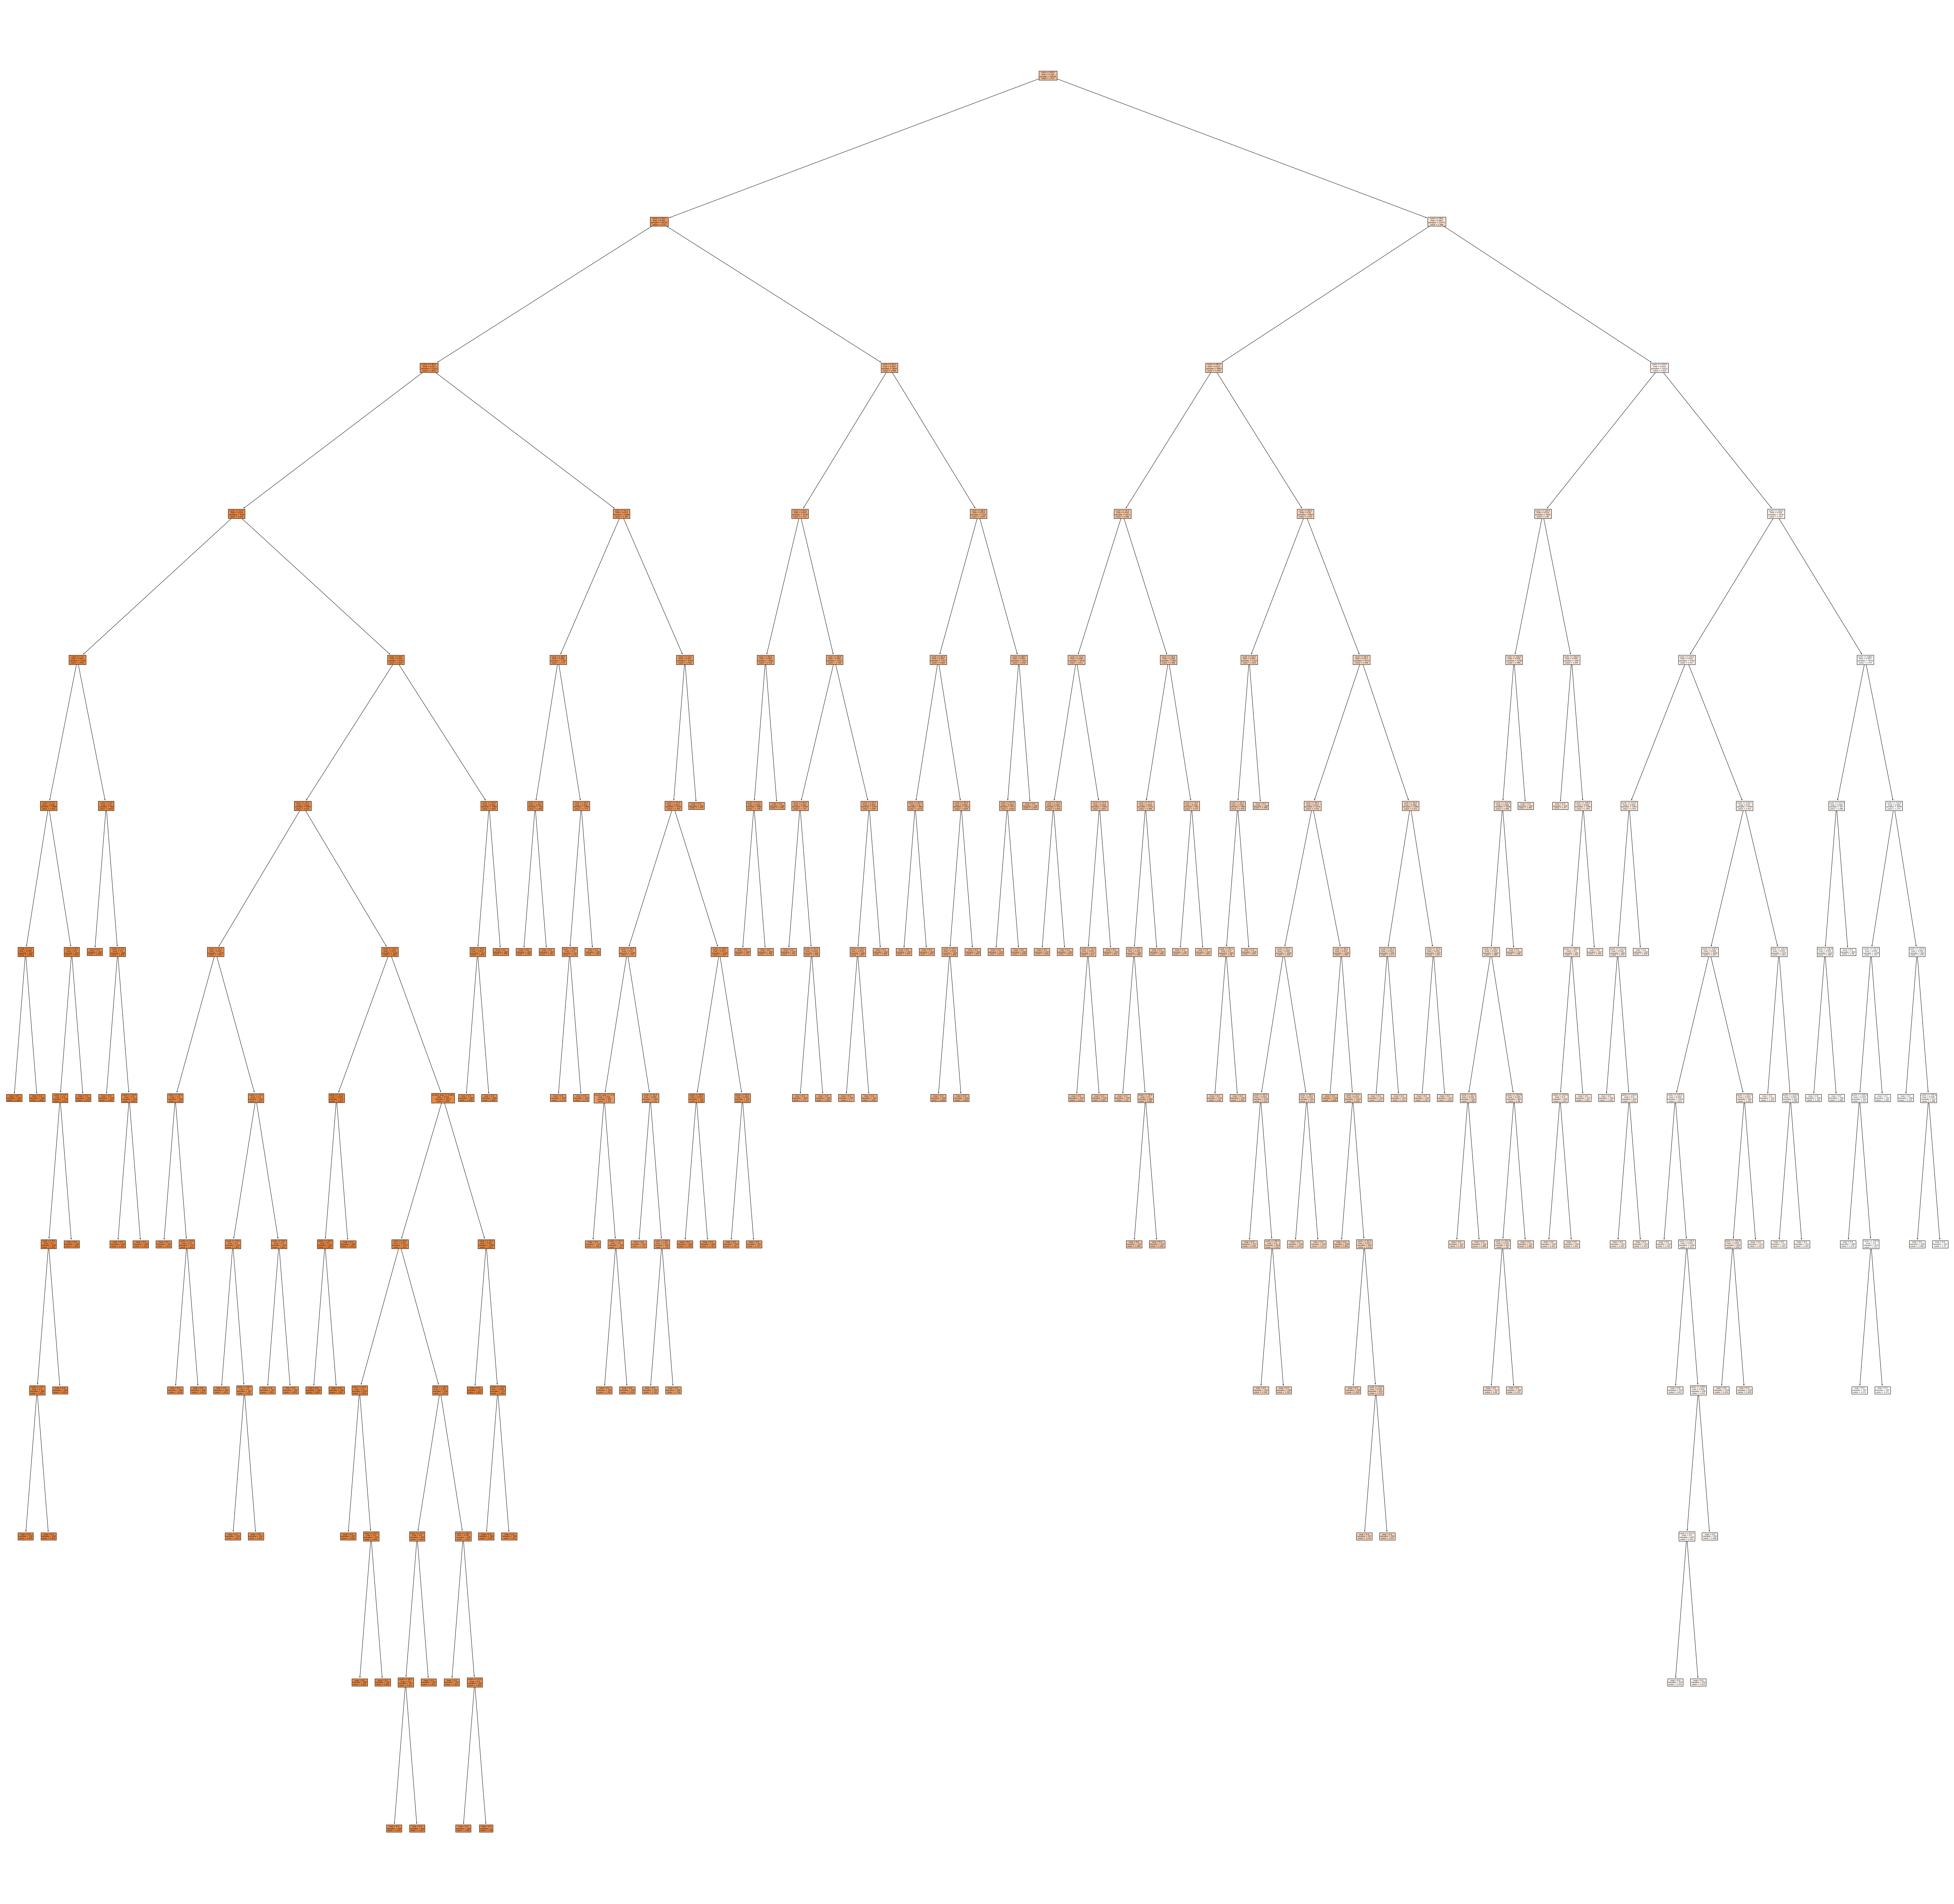

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(rgrsr, feature_names=['cycle', 'ambient_temperature',
                                 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time'], filled=True)

## Auto ML

## TPOT

In [2]:
# load data
X_train = load(open('pickle/dataset/battery/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/y_test.pkl', 'rb'))

In [3]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('TPOT/tpot_battery_pipeline.py')

                                                                                 
Generation 1 - Current best internal CV score: -0.00142457118092054
                                                                              
Generation 2 - Current best internal CV score: -0.0013477184788433596
                                                                                   
Generation 3 - Current best internal CV score: -0.000833283014262289
                                                                                   
Generation 4 - Current best internal CV score: -0.000833283014262289
                                                                                
Generation 5 - Current best internal CV score: -0.000833283014262289
                                                             
Best pipeline: LassoLarsCV(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=19, min_samples_split=15, n_estimators=100), normalize=

/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [4]:
X_train

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...
40223,135,24,3.360799,-2.010457,36.185453,1.9982,2.398,1855.031
40224,135,24,3.358384,-2.012746,36.238577,1.9982,2.396,1864.406
40225,135,24,3.356175,-2.012531,36.295522,1.9982,2.394,1873.703
40226,135,24,3.353691,-2.012193,36.352229,1.9982,2.392,1883.063


/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


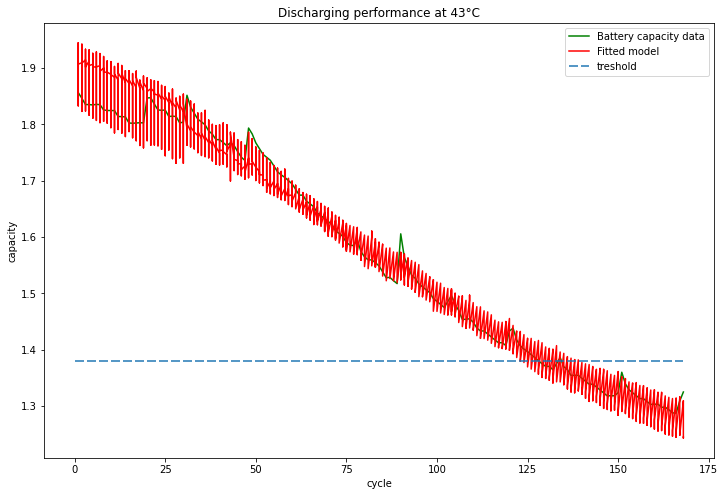

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=19, min_samples_split=15, n_estimators=100)),
    LassoLarsCV(normalize=False)
)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_train.append(X_test))

fig, ax = plt.subplots(1, figsize=(12, 8))

dataset, capacity = load_data('B0005')
X = dataset[['cycle']]
y = dataset['capacity']
ax.plot(X, y, color='green', label='Battery capacity data')
ax.plot(X, results, color='red', label='Fitted model')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
ax.set(xlabel='cycle', ylabel='capacity', title='Discharging performance at 43°C')
ax.legend()


In [9]:
dataset['pre'] = results
dataset

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,pre
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.911539
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.886265
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.847153
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.845328
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.848425
...,...,...,...,...,...,...,...,...,...,...,...
50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.244044
50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.243326
50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.244406
50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.249950


In [10]:
#ln = len(X_train)
pred=0
Afil=0
Pfil=0
a=dataset['capacity'].values
b=dataset['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=dataset['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=dataset['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 124
The error of RUL= -5 Cycle(s)


In [20]:
import sklearn.metrics
train_predictions = exported_pipeline.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = exported_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train RMSE: 0.021
Train R2 score: 0.9822529302397501
Test RMSE: 0.029
Test R2 score: -0.7734532644243903


/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


## XGBRegressor 

In [21]:
# load data
X_train = load(open('pickle/dataset/battery/X_train.pkl', 'rb'))
y_train = load(open('pickle/dataset/battery/y_train.pkl', 'rb'))
X_test = load(open('pickle/dataset/battery/X_test.pkl', 'rb'))
y_test = load(open('pickle/dataset/battery/y_test.pkl', 'rb'))

In [22]:
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

# Average CV score on the training set was: -0.0008766141596485714
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.001, max_depth=1, min_child_weight=9, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.45, verbosity=0)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    LassoLarsCV(normalize=True)
)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_train.append(X_test))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


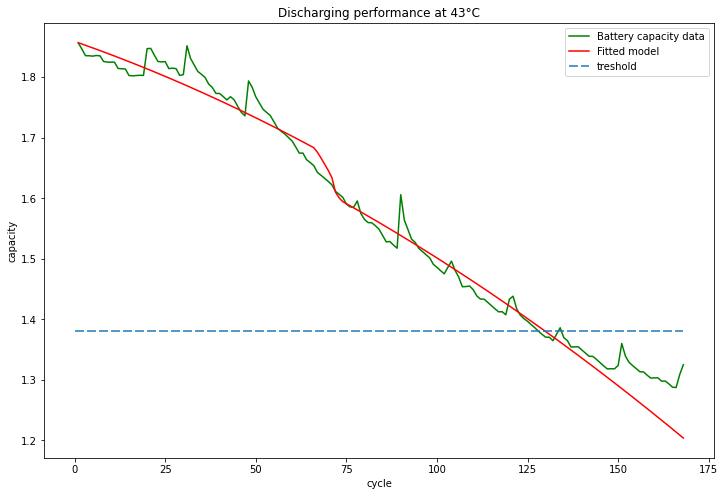

In [23]:
fig, ax = plt.subplots(1, figsize=(12, 8))

dataset, capacity = load_data('B0005')
X = dataset[['cycle']]
y = dataset['capacity']
ax.plot(X, y, color='green', label='Battery capacity data')
ax.plot(X, results, color='red', label='Fitted model')
ax.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
ax.set(xlabel='cycle', ylabel='capacity', title='Discharging performance at 43°C')
ax.legend()


In [25]:
dataset['pre'] = results

In [26]:
#ln = len(X_train)
pred=0
Afil=0
Pfil=0
a=dataset['capacity'].values
b=dataset['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=dataset['cycle'][j]
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=dataset['cycle'][k]
        break
print("The Actual fail at cycle number: "+ str(Afil))
print("The prediction fail at cycle number: "+ str(Pfil))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 129
The prediction fail at cycle number: 130
The error of RUL= 1 Cycle(s)


In [27]:
train_predictions = exported_pipeline.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train RMSE: %.3f' % rmse)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = exported_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE: %.3f' % rmse)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train RMSE: 0.020
Train R2 score: 0.9826512195746897
Test RMSE: 0.052
Test R2 score: -4.7678464149143815
